In [1]:
# Notebook to view the classifications of reactions used for set of retrosynthetic routes

In [27]:
import pandas as pd
import json
import sys
import os
import ast
import numpy as np

sys.path.append('../../../')

#import aizynthfinder.chem as chem
import aizynthfinder.analysis

from aizynthfinder.mcts.node import Node
from aizynthfinder.analysis import ReactionTree
from aizynthfinder.mcts.state import State
from aizynthfinder.chem import TreeMolecule
from aizynthfinder.context.collection import ContextCollection
from aizynthfinder.context.stock import StockException

from Maranga.utils.parse_multismiles import findkeys

import matplotlib.pyplot as plt

In [2]:
file_ext = '/data/localhost/not-backed-up/mokaya/exscientia/'

In [13]:
#load in opt_hashes
with open('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/opt4_class/opt_hashes.json', 'r') as f:
    s_opt_hash = json.load(f)

In [3]:
# Load from hdf5 file
hdf_file = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/std/tg2_std_results.hdf5'

data = pd.read_hdf(hdf_file, 'table')
solved_data = data.loc[(data.is_solved==True)]
print(len(solved_data))
reactions_1 = solved_data.trees.values

28


In [4]:
# # file location of json file
# json_file_1 = os.path.join(file_ext, 'aizynthfinder/Maranga/experiments/target_2/results/opt4_class/tg2_std_opt4_novelrxns.json')

# with open(json_file_1) as f:
#     data_1 = json.load(f)

# data_1_r = data_1.get('reaction trees')
# #data_1_r = [ast.literal_eval(i) for i in data_1_r]
# reactions_1 = [json.loads(i) for i in data_1_r]

In [5]:
#  # file location of json file
# json_file_2 = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/tg2_std_solved.json'

# with open(json_file_2) as f:
#     data_2 = json.load(f)

# data_2_r = data_2.get('reaction trees')
# reactions_2 = [json.loads(i) for i in data_2_r]

In [10]:
# Load from hdf5 file
hdf_file = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/opt4_class/hdf5/tg2_results_std_opt4_4.hdf5'

data_3 = pd.read_hdf(hdf_file, 'table')

solved_data_3 = data.loc[(data_3.is_solved==True)]
reactions_3 = solved_data_3.trees.values

In [4]:
# find classifications from list of reactio dicts and retuirn a dict with frequency
def count_reactions(rxns):
    templates = []
    templates_dict = {}
    for i in rxns:
        templates.extend(list(findkeys(i, 'template_hash')))

    print('# Templates: ', len(templates))

    for i in templates:
        if i in templates_dict:
            templates_dict[i] += 1
        else:
            templates_dict[i] = 1
    return templates_dict


In [5]:
templates_1 = count_reactions(reactions_1)
s_templates_1 = dict(sorted(templates_1.items(), key=lambda kv: kv[1], reverse=True))
print(len(s_templates_1))



# Templates:  1226
172


In [37]:
import random

random10 = random.sample(s_templates_1.keys(), 10)
print(random10)

['Acid to acid chloride', 'N-substitution with alkyl-X', 'Other deprotections', 'Nitro to amine reduction', 'Alcohol to halide', 'O-substitution', 'Ketone to alcohol', 'O-acylation to ester', 'Heteroaryl N-alkylation', 'N-arylation with Ar-X']


In [24]:
templates_2 = count_reactions(reactions_2)
print(len(templates_2))
s_templates_2 = dict(sorted(templates_2.items(), key=lambda kv: kv[1], reverse=True))

# Templates:  1226
37


In [11]:
templates_3 = count_reactions(reactions_3)
print(len(templates_3))
s_templates_3 = dict(sorted(templates_3.items(), key=lambda kv: kv[1], reverse=True))

# Templates:  1790
180


In [6]:
for k, v in s_templates_1.items():
    label, num = k, v
    print ("{:<15} {:<10}".format(label, num))

e2c3ee5da9aa9675ad987be40beb5130d31e54544c07aad9093e3547 102       
cca685540fa090059d4b84008cff5859b106a1b153e3a038da801bc9 102       
69b86575f88b9f0c270424306fd5889c8e4ec122f68301130afe06ca 101       
9a5276992ccda13b6431b631a7a99deea628d1ae4a1226bec315ced4 95        
9a4c5ceadb3b4a753bb8f03491f138cd875a84f1d327e818237f90df 88        
49c1628032788008e8b4aa844c67dfa3dc3da53c87bef32faff5e68f 80        
53994dd2d8bb14288cdfb7c2951155e80ca49e2c98f7d531177a38b3 38        
c38df6bb72f417e54d2346e687e032ed86554f208af48effa9422912 28        
164bcd5926595fb14a6a9bdfa6263711f1e81657ce47f1a9ea439ccb 22        
cdf64d3572667bc7e141ba45c11101067cadbeb96e61acfa3c7a910d 20        
874f533cb23b97c467028e6036fbaafdbd21166dcb2c66b52ef718e1 19        
0a02d2d47df007d05d29f7b852c5bfe9dcbd7a32224d027cc636bd27 19        
bc7193984167c71913195a0abce257da8748eb7d4b76769dceef2d3f 18        
1eecabe0173fa39f206a365ccea98e2b763ff157e33c23433b777de4 16        
e189425e090fce77131c907ebf1468461240dd27d4457a40

In [15]:
for k, v in s_templates_3.items():
    label, num = k, v
    print ("{:<15} {:<10}".format(label, num))


fb44fedb5e2cc8d07bdd0b6fb6f327584934b65e8fb8e97e63bb7532 101       
55396c1492cc3823f0701ef923544f9f4c1af584b69f4ce5650dc5ae 101       
cb56e889c4d58493f51dcb909ba7fe2cb033e7b9cef243223f406e96 72        
bcfe289ae0f0e0813b1cd820cd4c7e6af63183ec43374bf2a60f7db7 72        
4adaee2f919129a728a81156383c0a0b04988e7bc84e82c9b95523a9 65        
e189425e090fce77131c907ebf1468461240dd27d4457a40d701e43e 62        
bc7193984167c71913195a0abce257da8748eb7d4b76769dceef2d3f 58        
cca685540fa090059d4b84008cff5859b106a1b153e3a038da801bc9 57        
69b86575f88b9f0c270424306fd5889c8e4ec122f68301130afe06ca 56        
9a4c5ceadb3b4a753bb8f03491f138cd875a84f1d327e818237f90df 55        
e2c3ee5da9aa9675ad987be40beb5130d31e54544c07aad9093e3547 51        
9a5276992ccda13b6431b631a7a99deea628d1ae4a1226bec315ced4 50        
b8d35231a9d964a0bcde41cb860d8e6c4726c2823ff5946d3ed0c3c9 45        
49c1628032788008e8b4aa844c67dfa3dc3da53c87bef32faff5e68f 44        
164bcd5926595fb14a6a9bdfa6263711f1e81657ce47f1a9

In [23]:
tem = list(s_templates_3.keys())

import random

rand21 = random.choices(tem, k=21)
print(rand21)

['Alcohol to halide', 'Cyano or imine to amine', 'Alcohol to halide', 'N-substitution with alkyl-X', 'Alcohol to halide', 'RCO2H deprotections', 'O-sulfonylation', 'RCO2H deprotections', 'Other C-C bond formation', 'Dehydration', 'Reductive amination', 'Alcohol to halide', 'Alcohol to halide', 'S-substitution', 'Acid to acid chloride', 'O-substitution', 'Nitro to amine reduction', 'Stille reaction', 'Stille reaction', 'Heteroaryl N-alkylation', 'Reductive amination']


In [11]:
opt_list = ['Unassigned', 'Heteroaryl N-alkylation', 'Halogenation', 'Reductive amination', 'Alcohol to halide', 'RCO2H deprotections', 'Other reductions', 'O-containing heterocycle formation', 'Other functional group interconversion', 'Stille reaction', 'Ketone to alcohol', 'ROH deprotections', 'O-substitution', 'Friedel-Crafts reaction', 'NH deprotections', 'O-sulfonylation', 'S-substitution', 'N-substitution with alkyl-X', 'Nitro to amine reduction', 'Amide to amine reduction', 'N-arylation with Ar-X', 'Other deprotections', 'Alkene to alkane', 'O-acylation to ester', 'NH protections', 'Dehydration', 'N-acylation to amide']

In [19]:
# determine if any reactions optimised don't feature
for i in opt_list:
    if i not in s_templates_1.keys():
        print(i)

Stille reaction
Alkene to alkane
NH protections
Dehydration


In [36]:
print(sum(s_templates_3.values()))

1199


In [21]:
def calculate_freq_difference(opt, std, hashes):
    difference = {}

    for i in hashes:
        o = opt.get(i)
        s = std.get(i)

        opt_total = sum(opt.values())
        std_total = sum(std.values())

        if o != None and s != None:
            difference[i] = (o/opt_total)*100 - (s/std_total)*100
        
            #print('Reaction not used before/after optimisation.')
    
    return difference

In [32]:
diff = calculate_freq_difference(s_templates_3, s_templates_1, s_opt_hash)
s_diff = dict(sorted(diff.items(), key=lambda kv: kv[1], reverse=True))

hashes_to_optimise = []
for key, val in s_diff.items():
    if val > 0:
        hashes_to_optimise.append(key)



In [33]:
print(hashes_to_optimise)

['55396c1492cc3823f0701ef923544f9f4c1af584b69f4ce5650dc5ae', 'fb44fedb5e2cc8d07bdd0b6fb6f327584934b65e8fb8e97e63bb7532', '4adaee2f919129a728a81156383c0a0b04988e7bc84e82c9b95523a9', 'e189425e090fce77131c907ebf1468461240dd27d4457a40d701e43e', 'bc7193984167c71913195a0abce257da8748eb7d4b76769dceef2d3f', '5b2ff2a69fb7bd6a032938e468684773bcc668928b037bbec0ac8335', 'a320ddb3757b01284fda83a0e3c578c5f2f64f0ce6fab4668551b443', '368b3f927702b41932c1075690d6eeba50254e115711ea09825c0c9c', '2198be2381e37a3334f25c59fbeede1694f6fea560c8926b33da47aa', '3d15f069778b9af5a2330e3dc34ba771954d176a2e0bad76d157aeca', '9860ae00c69ec5f62a57f92b2877531856501cab10bf169231c3b9a0', '3f112fb289bac1f05b1a74f7afd73d0dad9ae0e80c6f59107df8cdb1', '164bcd5926595fb14a6a9bdfa6263711f1e81657ce47f1a9ea439ccb', 'f0a489cd79c24ed642d5256650cdb0f98e5344b2c074824b17336ecc', '0f35e4698af78868189072042f755bea621b23e196ec3dd2372ca253', '0b3c21f06ca16236914754283451a7cc64e549c75373335b7717c09e', 'b09baddfd5988158c3a819435de5f508e6fb5e

<function matplotlib.pyplot.show(close=None, block=None)>

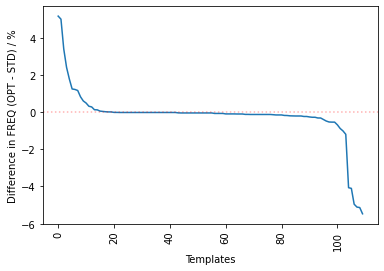

In [31]:
plt.plot(np.arange(len(s_diff.values())), s_diff.values())
plt.xticks(rotation=90)
plt.xlabel('Templates')
plt.ylabel('Difference in FREQ (OPT - STD) / %')
plt.axhline(y=0, alpha=0.3, c='red', linestyle='dotted')
plt.show

In [58]:
to_optimise_hash = []
for i in s_templates_2:
    if i not in s_templates_1:
        print(i)
        to_optimise_hash.append(i)

Dehydration


In [59]:
print(to_optimise_hash)
print('Length: ', len(to_optimise_hash))

['Dehydration']
Length:  1


In [60]:
print(s_templates_1)

{'Unassigned': 250, 'Heteroaryl N-alkylation': 201, 'Reductive amination': 158, 'Halogenation': 133, 'RCO2H deprotections': 110, 'Other functional group interconversion': 49, 'O-acylation to ester': 31, 'Amide to amine reduction': 27, 'Other reductions': 26, 'ROH deprotections': 20, 'O-substitution': 20, 'Alcohol to halide': 19, 'N-arylation with Ar-X': 18, 'Alcohols to aldehydes': 15, 'NH deprotections': 15, 'N-acylation to amide': 15, 'Friedel-Crafts reaction': 13, 'Ester to alcohol': 13, 'Stille reaction': 12, 'Acid to acid chloride': 11, 'Alkene oxidative cleavage': 9, 'S-substitution': 9, 'N-substitution with alkyl-X': 8, 'Ketone to alcohol': 8, 'O-sulfonylation': 7, 'Other functional group addition': 5, 'Nitro to amine reduction': 4, 'NH protections': 4, 'O-containing heterocycle formation': 3, 'Alkene to alkane': 3, 'Suzuki coupling': 2, 'Other deprotections': 2, 'Other organometallic C-C bond formation': 2, 'Cyano or imine to amine': 1, 'RSH deprotections': 1, 'Alkyne to alkane

In [61]:
s_total_1 = sum(list(s_templates_1.values()))
s_total_2 = sum(list(s_templates_2.values()))
print(s_total_1)
print(s_total_2)

1226
384


TypeError: unhashable type: 'slice'

In [62]:
for label, val in s_templates_1.items():
    prop = val / 1226
    for lab, v in s_templates_2.items():
        p = v / 1459
        if label == lab and p > prop:
            print(label)
            print('prop: ', prop)
            print('p: ', p)
            to_optimise_hash.append(label)
            print('')

Alcohol to halide
prop:  0.015497553017944535
p:  0.018505825908156272

O-containing heterocycle formation
prop:  0.0024469820554649264
p:  0.010966415352981495



In [63]:
print(to_optimise_hash)
print(len(to_optimise_hash))

['Dehydration', 'Alcohol to halide', 'O-containing heterocycle formation']
3


In [64]:
print(len(set(to_optimise_hash)))

3


[246, 189, 132, 129, 107, 57, 49, 47, 32, 32, 28, 23, 22, 16, 14, 13, 11, 11, 7, 5, 5, 4, 4, 3, 2]
[213, 168, 119, 107, 82, 34, 32, 13, 11, 9, 8, 7, 7, 5, 5, 4, 4, 4, 3, 3, 2, 2, 1]


<function matplotlib.pyplot.show(close=None, block=None)>

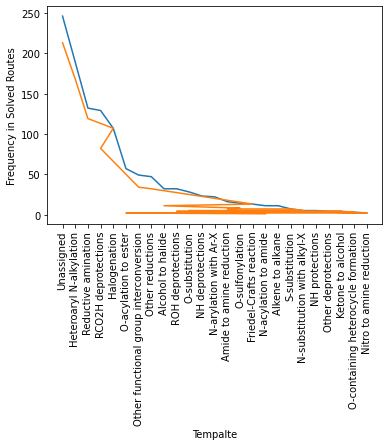

In [66]:
import matplotlib.pyplot as plt

temps = list(opt_s_templates_3.keys())
dc = list(opt_s_templates_3.values())

temps_1 = list(opt_s_templates_1.keys())
dc_1 = list(opt_s_templates_1.values())
print(dc)
print(dc_1)

plt.plot(temps, dc)
plt.plot(temps_1, dc_1)
plt.xticks(rotation=90)
plt.xlabel('Tempalte')
plt.ylabel('Frequency in Solved Routes')
plt.show

In [58]:
opt_list = ['Unassigned', 'Heteroaryl N-alkylation', 'Halogenation', 'Reductive amination', 'Alcohol to halide', 'RCO2H deprotections', 'Other reductions', 'O-containing heterocycle formation', 'Other functional group interconversion', 'Stille reaction', 'Ketone to alcohol', 'ROH deprotections', 'O-substitution', 'Friedel-Crafts reaction', 'NH deprotections', 'O-sulfonylation', 'S-substitution', 'N-substitution with alkyl-X', 'Nitro to amine reduction', 'Amide to amine reduction', 'N-arylation with Ar-X', 'Other deprotections', 'Alkene to alkane', 'O-acylation to ester', 'NH protections', 'Dehydration', 'N-acylation to amide']

In [70]:
opt_template_3 = {}
for k,v in s_templates_3.items():
    if k in opt_list:
        opt_template_3[k] = v

opt_s_templates_3 = dict(sorted(opt_template_3.items(), key=lambda kv: kv[1], reverse=True))

opt_template_1 = {}
for k,v in s_templates_1.items():
    if k in opt_list:
        opt_template_1[k] = v


for key in opt_o_temps:
    opt_template_1[key] = opt_template_1.pop(key)

print(len(opt_s_templates_3))


KeyError: 'Alkene to alkane'

In [69]:
o_temps=['Unassigned', 'Heteroaryl N-alkylation', 'Reductive amination', 'RCO2H deprotections', 'Halogenation', 'O-acylation to ester', 'Other functional group interconversion', 'Other reductions', 'Alcohol to halide', 'ROH deprotections', 'O-substitution', 'NH deprotections', 'N-arylation with Ar-X', 'Amide to amine reduction', 'O-sulfonylation', 'Friedel-Crafts reaction', 'N-acylation to amide', 'Alkene to alkane', 'Acid to acid chloride', 'S-substitution', 'N-substitution with alkyl-X', 'NH protections', 'Other deprotections', 'Ketone to alcohol', 'O-containing heterocycle formation', 'Nitro to amine reduction', 'Alcohols to aldehydes']
opt_o_temps = [i for i in o_temps if i in opt_list]